### SimpleRNN 구조와 예제
- 가장 간단한 RNN구조
- W를 다음 셀에 전달하는 구조
- 시계열 의미 반영
- 윈도우 크기 - w : 예측할 데이터 묶음의 크기, 수평선 계수 - h : 예측할 값과 데이터와의 거리
- tf.keras.SimpleRNN(units = 10, activation = 'tanh', input_shape = (3, 1))
- unit : 은닉층의 노드와 같은 개념, RNN내부에 노드가 10개가 존재하고 10개의 활성화 함수가 있다
- input_shape (3, 1) : 3개의 tims-step 데이터를 이용한다.

#### RNN 개발 프로세스
- 시계열 데이터 정의
- 학습 데이터 생성
  - batch_size, time_steps, input_dims
- RNN 모델 구축 및 학습

In [1]:
# 시계열 데이터 y = 0,5sini(x) - cos(x/2) 정의

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras import Sequential

x = np.arange(0, 100, 0.1)
y = 0.5 * np.sin(2 * x) - np.cos(x / 2.0)

seq_data = y.reshape(-1, 1) # 집어넣기 좋게 (1000, 1)형태로 바꿔줌

print(seq_data.shape)
print(seq_data[:5])

(1000, 1)
[[-1.        ]
 [-0.89941559]
 [-0.80029499]
 [-0.70644984]
 [-0.62138853]]


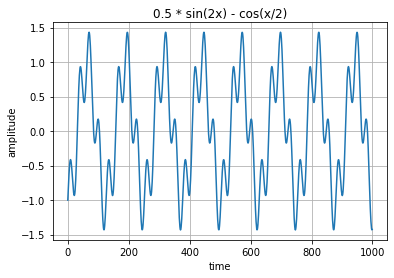

In [2]:
plt.grid()
plt.title("0.5 * sin(2x) - cos(x/2)")
plt.xlabel("time")
plt.ylabel("amplitude")
plt.plot(seq_data)

plt.show()

# 이걸로 데이터가 주기성이 있읍을 확인

In [4]:
# 함수 정의 seq2dataset

def seq2dataset(seq, window, horizon):
    X = []
    Y = []
    
    for i in range(len(seq) - (window + horizon) + 1):
        x = seq[i:(i + window)]
        y = (seq[i + window + horizon - 1])
        
        X.append(x)
        Y.append(y)
        
    return np.array(X), np.array(Y)

In [7]:
# 입력 데이터 X, 정답데이터 Y 생성

w = 20
h = 1
X, Y = seq2dataset(seq_data, w, h)

print(X.shape, Y.shape)

(980, 20, 1) (980, 1)


In [8]:
# 데이터셋 분리

split_ratio = 0.8

split = int(split_ratio * len(X))

x_train = X[0:split]
y_train = Y[0:split]

x_test = X[split:]
y_test = Y[split:]

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(784, 20, 1) (784, 1) (196, 20, 1) (196, 1)


In [10]:
# 모델 구축

model = Sequential()
model.add(SimpleRNN(units = 128, activation = 'tanh', input_shape = x_train[0].shape))

model.add(Dense(1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 128)               16640     
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 16,769
Trainable params: 16,769
Non-trainable params: 0
_________________________________________________________________


In [11]:
# 학습

model.compile(loss = "mse", optimizer = "adam", metrics = ['mae'])

hist = model.fit(x_train, y_train, epochs = 100, validation_data = (x_test, y_test))


Epoch 1/100
25/25 [==============================] - 1s 8ms/step - loss: 0.0775 - mae: 0.1711 - val_loss: 0.0069 - val_mae: 0.0686
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0034 - mae: 0.0476 - val_loss: 0.0013 - val_mae: 0.0278
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0011 - mae: 0.0271 - val_loss: 9.5068e-04 - val_mae: 0.0254
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 7.3646e-04 - mae: 0.0225 - val_loss: 4.7425e-04 - val_mae: 0.0174
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 4.7975e-04 - mae: 0.0174 - val_loss: 3.2353e-04 - val_mae: 0.0140
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 2.9958e-04 - mae: 0.0137 - val_loss: 2.1659e-04 - val_mae: 0.0115
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 1.7426e-04 - mae: 0.0104 - val_loss: 1.3559e-04 - val_mae: 0.0092
Epoch 8/100
25/25 [============================

Epoch 60/100
25/25 [==============================] - 0s 3ms/step - loss: 1.5967e-05 - mae: 0.0032 - val_loss: 1.4826e-05 - val_mae: 0.0033
Epoch 61/100
25/25 [==============================] - 0s 4ms/step - loss: 1.4373e-05 - mae: 0.0030 - val_loss: 2.8143e-05 - val_mae: 0.0047
Epoch 62/100
25/25 [==============================] - 0s 3ms/step - loss: 3.4717e-05 - mae: 0.0048 - val_loss: 1.7652e-05 - val_mae: 0.0035
Epoch 63/100
25/25 [==============================] - 0s 3ms/step - loss: 9.8218e-06 - mae: 0.0025 - val_loss: 1.0805e-05 - val_mae: 0.0026
Epoch 64/100
25/25 [==============================] - 0s 3ms/step - loss: 1.8405e-05 - mae: 0.0033 - val_loss: 1.5967e-05 - val_mae: 0.0033
Epoch 65/100
25/25 [==============================] - 0s 3ms/step - loss: 1.7745e-05 - mae: 0.0034 - val_loss: 6.2424e-06 - val_mae: 0.0020
Epoch 66/100
25/25 [==============================] - 0s 4ms/step - loss: 4.3550e-05 - mae: 0.0054 - val_loss: 5.8135e-05 - val_mae: 0.0068
Epoch 67/100
25/25 [

In [12]:
#  정확도 및 손실

pred = model.predict(x_test)
print(pred.shape)


(196, 1)


In [14]:
rand_idx = np.random.randint(0, len(y_test), size = 5)

print('random idx = ', rand_idx, "\n")
print("pred = ", pred.flatten()[rand_idx])
print("label = ", y_test.flatten()[rand_idx])

rand_idx = np.random.randint(0, len(y_test), size = 5)

print('random idx = ', rand_idx, "\n")
print("pred = ", pred.flatten()[rand_idx])
print("label = ", y_test.flatten()[rand_idx])


random idx =  [ 63 156 100  95 148] 

pred =  [-1.0892648   0.45269495 -0.8349454  -0.903827    1.3433199 ]
label =  [-1.09409016  0.46267516 -0.83954079 -0.90033655  1.36121199]
random idx =  [66 15 89 65 74] 

pred =  [-1.3421881  1.2027988 -0.5654632 -1.2758014 -1.1398964]
label =  [-1.35416279  1.20572729 -0.55845475 -1.28569752 -1.15825315]


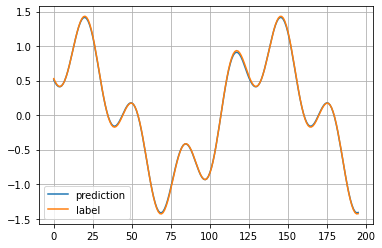

In [15]:
# 그래프로 예측

plt.plot(pred, label = "prediction")
plt.plot(y_test, label = "label")
plt.grid()
plt.legend(loc = 'best')

plt.show()

# 와우 거의 일치!